In [1]:
import nbsetup
import ergodicpy as ep
import numpy as np
import pandas as pd
import seaborn as sns

# Ergodicity

Watch Ole Peters fantastic TED talk below for a good summary
https://www.youtube.com/watch?v=LGqOH3sYmQA

To accompany this, below is the gambler game he describes for you to play with.

In [2]:
def gambler(ensembles, timesteps=100):
    data = {'x': np.arange(timesteps+1)}
    for i in range(ensembles):
        # start with 100 pounds
        series = [100]
        for t in range(timesteps):
            # win you're up 50%
            if np.random.choice([True, False]):
                s = series[t]*1.5
            # lose you're down 40%
            else:
                s = series[t]*0.6
            series.append(s)
        data[i] = np.array(series)
    
    # plot
    df = pd.DataFrame(data)
    g = sns.lineplot(x='x', y='value', ci=None, hue='variable', data=df.melt(id_vars=['x']), legend=0, palette='icefire')
    g.set(yscale='log')

Looking at 2 gamblers paths, we can see over time they are very different.

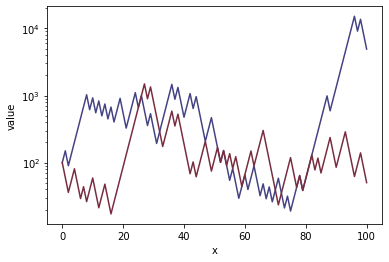

In [3]:
gambler(2)

Then looking at the same for 100 gamblers, it makes it obvious.

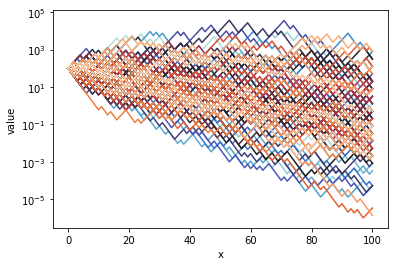

In [4]:
gambler(100)

# Distributions ergodicity

Visually we can think about this as rather than just the value changing over time, the distribution of values changes.

Here it's worth noting that the ergodic distribution (i.e. the average of the individual ones) on the right broadly matches the individual ones on the left.

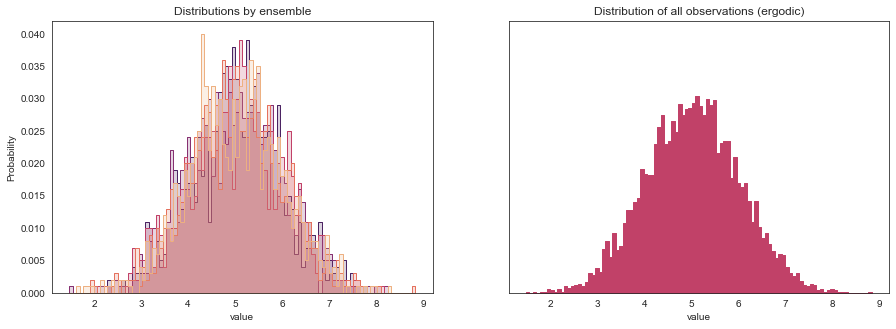

In [5]:
observations = np.array([np.random.normal(5,1,1000) for n in range(5)])
ergodic = ep.ErgodicEnsemble(observations)
ergodic.plot()

It's hard to see how all they all stack up on top of each other. So a ridge plot often makes this easier to see.

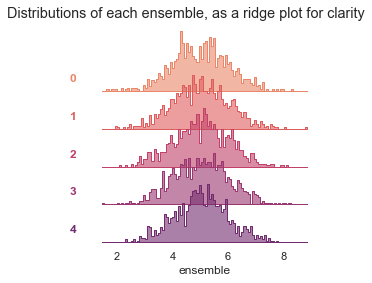

In [6]:
ergodic.ridge()

Now let's try varying the position of the peak of this normal distribution and see what happens.

The key thing to notice here is how the ergodic distribution flatten right out, increasing it's entropy.

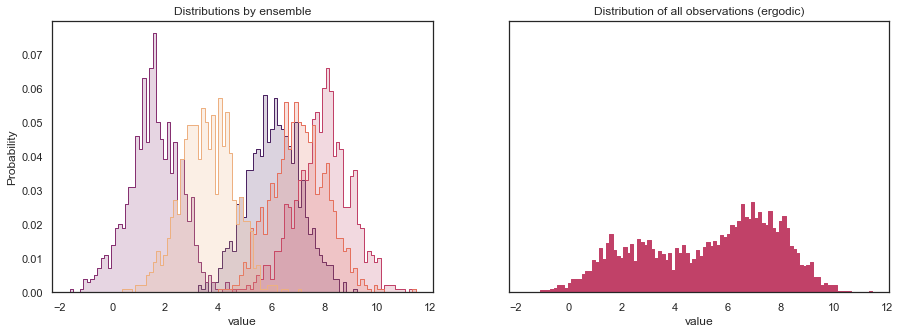

In [7]:
observations = np.array([np.random.normal(np.random.normal(5,2),1,1000) for n in range(5)])
non_ergodic = ep.ErgodicEnsemble(observations)
non_ergodic.plot()

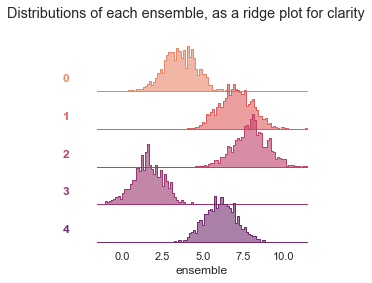

In [8]:
non_ergodic.ridge()

Finally comparing their stats we see concrete differences in their ergodic complexity measures

In [10]:
print("Stats of first ergodic sample:")
ergodic.stats(True)
print("\n\nStats of second non-ergodic sample:")
non_ergodic.stats(True)

Stats of first ergodic sample:
mean ensemble entropy 3.974515536611274
ergodic entropy 4.016123934244433
ergodic divergence 0.04160839763315938
ergodic complexity (2) 0.01120230730350278
ergodic complexity (1st moment) 0.010360337059913703
ensembles count 5
entropies [3.9670466737223276, 3.9924225401323503, 3.986404000732124, 3.982022027428813, 3.944682441040756]
bins count 100
bins range (1.4753054298810557, 8.836026207529786)
observations {'minimum': 1000, 'mean': 1000.0, 'max': 1000}


Stats of second non-ergodic sample:
mean ensemble entropy 3.4286041095925577
ergodic entropy 4.281427627165627
ergodic divergence 0.8528235175730692
ergodic complexity (2) 0.19932012284799733
ergodic complexity (1st moment) 0.19919138937720446
ensembles count 5
entropies [3.407080341846334, 3.460472631290302, 3.464210583945346, 3.384421032665483, 3.426835958215325]
bins count 100
bins range (-1.602820122062603, 11.443103066918571)
observations {'minimum': 1000, 'mean': 1000.0, 'max': 1000}
